In [1]:
# Import Necessary Libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Data Preparation

In [2]:
# Import the required dataset

df = pd.read_csv('C:/Users/ariji/OneDrive/Desktop/Data science & ML/Unsupervised Machine Learning/Data/entertainment_clean.csv')
df.head()

,name,books,tv_shows,video_games
0,Aaliyah,0.5,4.6,4.9
1,Abigail,0.0,4.5,4.8
2,Addison,0.5,4.5,5.0
3,Adeline,3.5,4.5,6.6
4,Alana,2.8,3.8,5.6


In [6]:
# drop the non - numeric columns

data = df.iloc[: , 1:]
data.head()

,books,tv_shows,video_games
0,0.5,4.6,4.9
1,0.0,4.5,4.8
2,0.5,4.5,5.0
3,3.5,4.5,6.6
4,2.8,3.8,5.6


In [7]:
# Basic statistical analysis

data.shape

(150, 3)

In [9]:
data.describe()

,books,tv_shows,video_games
count,150.000000,150.000000,150.000000
mean,2.993333,4.586000,5.843333
std,1.917761,0.645587,0.828066
min,0.000000,3.000000,4.300000
25%,0.800000,4.200000,5.100000
50%,3.200000,4.500000,5.800000
75%,4.500000,4.900000,6.400000
max,6.200000,6.600000,7.900000


In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   books        150 non-null    float64
 1   tv_shows     150 non-null    float64
 2   video_games  150 non-null    float64
dtypes: float64(3)
memory usage: 3.6 KB


# 2. Fit an Isolation Forest Model

In [12]:
# import isolation forest from sklearn

from sklearn.ensemble import IsolationForest

In [13]:
# fit an isolation forest model with 2% of the data set as anomaly

# instantiate the model

model = IsolationForest(contamination=0.02)

# fit the model
model.fit(data)

C:\Users\ariji\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


IsolationForest(contamination=0.02)

In [15]:
# view the anomaly score 

df['anomaly_score'] = model.decision_function(data)
df.sort_values(by='anomaly_score' , ascending=False).head()

,name,books,tv_shows,video_games,anomaly_score
89,Lorelei,3.2,4.2,5.7,0.230870
72,Jade,3.2,4.2,5.7,0.230870
17,Bella,0.5,5.1,5.1,0.229109
30,Colette,3.2,4.4,5.7,0.227757
99,Mia,0.5,5.1,5.0,0.226819


In [18]:
# view the anomaly flags

df['Anomaly'] = model.predict(data)
df.sort_values(by='anomaly_score').head()

,name,books,tv_shows,video_games,anomaly_score,Anomaly
15,Avery,1.0,6.6,5.7,-0.036388,-1
110,Octavia,5.0,5.7,7.9,-0.024987,-1
37,Elena,0.8,3.4,4.5,-0.018116,-1
147,Zara,5.5,5.7,7.7,0.000370,1
29,Clementine,6.2,5.4,7.2,0.008508,1


# 3. Visualize the Anomalies

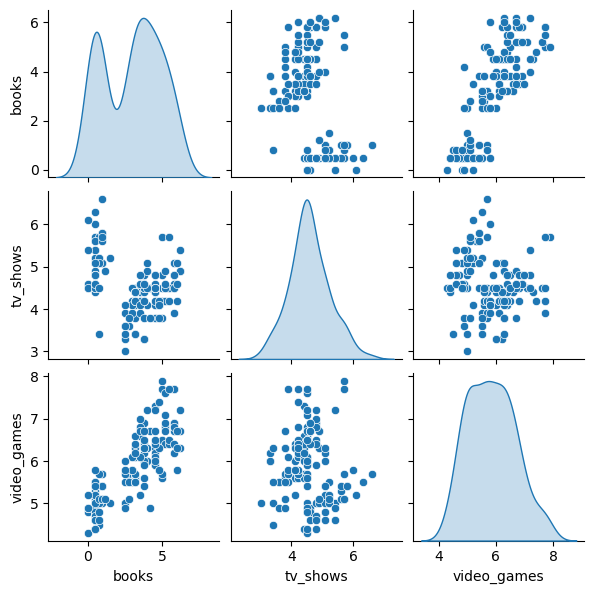

In [22]:
# View a pair plot of the original dataset 

sns.pairplot(data , diag_kind='kde' , height=2);

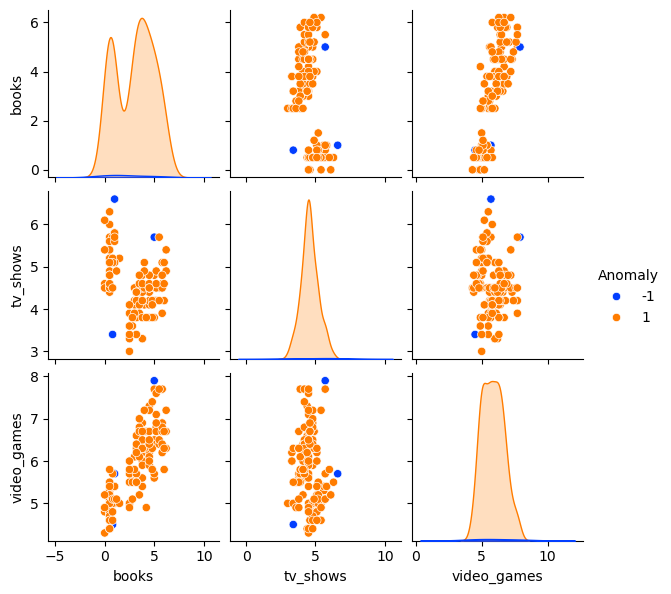

In [26]:
# overlay the isolation forest detected outliers

sns.pairplot(df.drop(columns='anomaly_score') , hue='Anomaly' , palette='bright' , height=2);

# 4. Finetune the Model

In [27]:
# update the model to flag 5% of rows as anomalies

model5 = IsolationForest(contamination=0.05)
model5.fit(data)

C:\Users\ariji\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


IsolationForest(contamination=0.05)

In [28]:
# view the anomaly scores

df['anomaly_score5'] = model.decision_function(data)
df.sort_values('anomaly_score5').head()

,name,books,tv_shows,video_games,anomaly_score,Anomaly,anomaly_score5
15,Avery,1.0,6.6,5.7,-0.036388,-1,-0.036388
110,Octavia,5.0,5.7,7.9,-0.024987,-1,-0.024987
37,Elena,0.8,3.4,4.5,-0.018116,-1,-0.018116
147,Zara,5.5,5.7,7.7,0.000370,1,0.000370
29,Clementine,6.2,5.4,7.2,0.008508,1,0.008508


In [32]:
# view the anomaly flags

df['anomaly_5'] = model5.predict(data)
df.sort_values(by='anomaly_5').head(10)

,name,books,tv_shows,video_games,anomaly_score,Anomaly,anomaly_score5,anomaly_5
19,Bianca,5.8,3.9,7.7,0.031732,1,0.031732,-1
147,Zara,5.5,5.7,7.7,0.000370,1,0.000370,-1
148,Zoe,0.0,6.1,5.2,0.026148,1,0.026148,-1
37,Elena,0.8,3.4,4.5,-0.018116,-1,-0.018116,-1
110,Octavia,5.0,5.7,7.9,-0.024987,-1,-0.024987,-1
15,Avery,1.0,6.6,5.7,-0.036388,-1,-0.036388,-1
58,Hailey,2.5,3.0,5.0,0.032518,1,0.032518,-1
29,Clementine,6.2,5.4,7.2,0.008508,1,0.008508,-1
97,Matthew,4.5,4.5,5.9,0.213513,1,0.213513,1
98,Melody,3.2,4.4,6.4,0.193208,1,0.193208,1


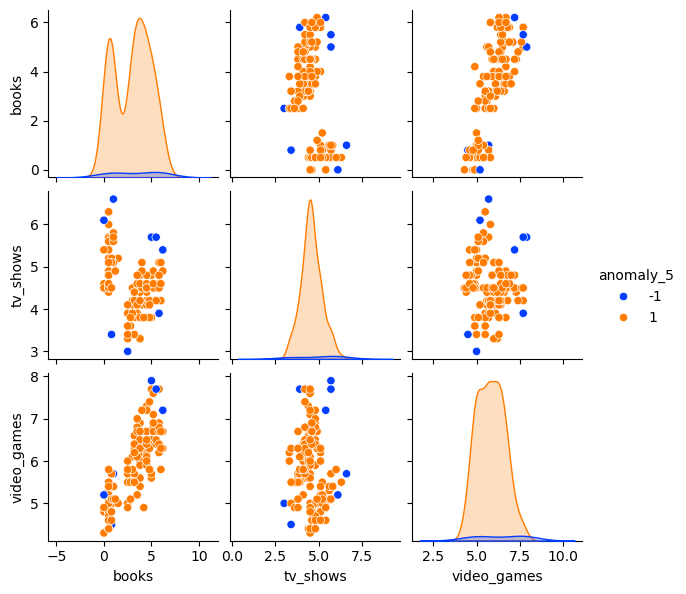

In [34]:
# overlay the isolation forest detected outliers

sns.pairplot(df.drop(columns=['anomaly_score', 'Anomaly' , 'anomaly_score5']) , hue='anomaly_5' , palette='bright' , height=2);

# 5. DBSCAN

# Fit a DB Scan Model

In [35]:
# view the data

data.head()

,books,tv_shows,video_games
0,0.5,4.6,4.9
1,0.0,4.5,4.8
2,0.5,4.5,5.0
3,3.5,4.5,6.6
4,2.8,3.8,5.6


In [36]:
# dbscan function (copied from clustering section) to find a good eps + min_samples combo
import numpy as np
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score

def tune_dbscan(data):

    results = []

    # define a range of eps and min_samples values to loop through
    eps_values = np.arange(.1, 2, .1)
    min_samples_values = np.arange(2, 10, 1)

    # loop through the combinations of eps and min_samples
    for eps in eps_values:
        for min_samples in min_samples_values:
            dbscan = DBSCAN(eps=eps, min_samples=min_samples)
            dbscan.fit(data)
            labels = dbscan.labels_

            # count the number of clusters (excluding noise points labeled as -1)
            n_clusters = len(set(labels)) - (1 if -1 in labels else 0)

            # count the number of noise points (labeled as -1)
            n_noise = list(labels).count(-1)

            # calculate the silhouette score (excluding noise points)
            if n_clusters > 1:  # silhouette score requires at least 2 clusters
                silhouette = silhouette_score(data, labels, metric='euclidean', sample_size=None)
            else:
                silhouette = None

            results.append([eps, min_samples, n_clusters, n_noise, silhouette])

    # put the results in a dataframe
    dbscan_results = pd.DataFrame(results, columns=["Eps", "Min Samples", "Number of Clusters",
                                                    "Number of Noise Points", "Silhouette Score"])
    return dbscan_results

In [37]:
# view the results on the original data
dbscan_results = tune_dbscan(data)
dbscan_results.head()

,Eps,Min Samples,Number of Clusters,Number of Noise Points,Silhouette Score
0,0.1,2,12,124,-0.438782
1,0.1,3,2,144,-0.483479
2,0.1,4,0,150,NaN
3,0.1,5,0,150,NaN
4,0.1,6,0,150,NaN


In [38]:
# sort the dataframe by highest silhoutte score

dbscan_results.sort_values(by='Silhouette Score' , ascending=False).head()

,Eps,Min Samples,Number of Clusters,Number of Noise Points,Silhouette Score
127,1.6,9,2,0,0.628673
109,1.4,7,2,0,0.628673
107,1.4,5,2,0,0.628673
106,1.4,4,2,0,0.628673
105,1.4,3,2,0,0.628673


In [ ]:
# return one eps + min_samples combo for each silhouette score
(dbscan_results.sort_values('Silhouette Score', ascending=False)
               .groupby('Silhouette Score')
               .head(1)).head(10)

In [45]:
(dbscan_results.sort_values('Silhouette Score', ascending=False).groupby('Silhouette Score').head(1)).head(10)

,Eps,Min Samples,Number of Clusters,Number of Noise Points,Silhouette Score
127,1.6,9,2,0,0.628673
76,1.0,6,2,2,0.550831
79,1.0,9,2,3,0.528540
72,1.0,2,2,1,0.515323
57,0.8,3,2,4,0.497686
62,0.8,8,2,5,0.482653
43,0.6,5,2,12,0.480329
52,0.7,6,2,9,0.476795
41,0.6,3,2,11,0.476287
63,0.8,9,2,6,0.471959


In [46]:
# fit a DBSCAN Model with the eps and Min Samples associated with highest Silhouette score which has noise point

dbscan = DBSCAN(eps=1.0 , min_samples=6)
dbscan.fit(data)

DBSCAN(eps=1.0, min_samples=6)

In [50]:
dbscan.labels_

array([ 0,  0,  0,  1,  1,  1,  1,  1,  0,  1,  1,  0,  0,  0,  0,  0,  1,
        0,  1,  1,  1,  1,  1,  1,  1,  1,  0,  0,  0,  1,  1,  1,  1,  1,
        1,  1,  1, -1,  0,  1,  1,  1,  0,  0,  1,  1,  0,  1,  0,  1,  1,
        1,  1,  1,  1,  1,  0,  1,  1,  1,  0,  0,  0,  1,  1,  1,  0,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  0,  0,  0,
        1,  1,  0,  0,  1,  0,  1,  1,  1,  1,  1,  1,  1,  1,  0,  1,  0,
        1,  1,  1,  1,  0,  1,  0,  0, -1,  1,  0,  0,  0,  1,  1,  0,  1,
        1,  1,  1,  0,  0,  0,  1,  1,  1,  1,  0,  0,  0,  1,  0,  1,  1,
        1,  1,  1,  1,  0,  0,  1,  1,  1,  1,  1,  1,  0,  0],
      dtype=int64)

# visualize the anomalies

In [48]:
# view the anomaly labels

df.head()

,name,books,tv_shows,video_games,anomaly_score,Anomaly,anomaly_score5,anomaly_5
0,Aaliyah,0.5,4.6,4.9,0.201940,1,0.201940,1
1,Abigail,0.0,4.5,4.8,0.115678,1,0.115678,1
2,Addison,0.5,4.5,5.0,0.199011,1,0.199011,1
3,Adeline,3.5,4.5,6.6,0.183557,1,0.183557,1
4,Alana,2.8,3.8,5.6,0.183479,1,0.183479,1


In [55]:
# add the anomaly labels from DBSCAN model to the dataframe

df['anomaly_dbscan'] = dbscan.labels_
df.head()

,name,books,tv_shows,video_games,anomaly_score,Anomaly,anomaly_score5,anomaly_5,anomaly_dbscan
0,Aaliyah,0.5,4.6,4.9,0.201940,1,0.201940,1,0
1,Abigail,0.0,4.5,4.8,0.115678,1,0.115678,1,0
2,Addison,0.5,4.5,5.0,0.199011,1,0.199011,1,0
3,Adeline,3.5,4.5,6.6,0.183557,1,0.183557,1,1
4,Alana,2.8,3.8,5.6,0.183479,1,0.183479,1,1


In [57]:
df[df['anomaly_dbscan'] == -1]

,name,books,tv_shows,video_games,anomaly_score,Anomaly,anomaly_score5,anomaly_5,anomaly_dbscan
37,Elena,0.8,3.4,4.5,-0.018116,-1,-0.018116,-1,-1
110,Octavia,5.0,5.7,7.9,-0.024987,-1,-0.024987,-1,-1


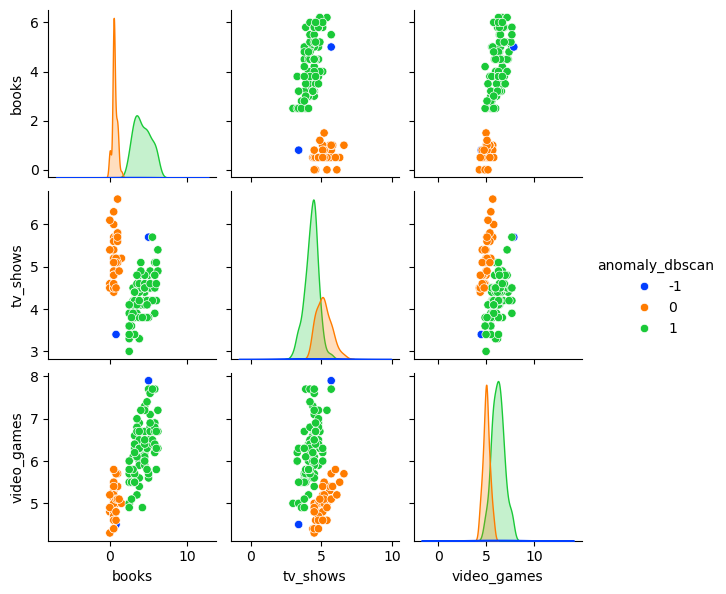

In [58]:
# create a pair plot
sns.pairplot(df[['books', 'tv_shows', 'video_games', 'anomaly_dbscan']], hue='anomaly_dbscan', palette='bright', height=2);

# Anomaly Detection Assignment Solution

In [59]:
# 1.a Import the required dataset

df = pd.read_csv('C:/Users/ariji/OneDrive/Desktop/Data science & ML/Unsupervised Machine Learning/Data/tripadvisor_reviews.csv')
df.head()

,user_id,avg_museum_rating,avg_park_rating,avg_restaurant_rating,avg_nightlife_rating
0,User 1,1.93,2.8,3.29,1.62
1,User 2,2.02,3.2,3.66,1.64
2,User 3,2.22,1.8,1.54,1.53
3,User 4,1.45,2.8,1.29,1.57
4,User 5,1.51,2.2,2.18,1.57


In [61]:
# 1.b Remove the user_id column

data = df.iloc[: , 1:]
data.head()

,avg_museum_rating,avg_park_rating,avg_restaurant_rating,avg_nightlife_rating
0,1.93,2.8,3.29,1.62
1,2.02,3.2,3.66,1.64
2,2.22,1.8,1.54,1.53
3,1.45,2.8,1.29,1.57
4,1.51,2.2,2.18,1.57


In [63]:
# 1.c understanding the data

data.describe()

,avg_museum_rating,avg_park_rating,avg_restaurant_rating,avg_nightlife_rating
count,980.000000,980.000000,980.000000,980.000000
mean,1.893194,2.352612,2.013306,1.532500
std,0.326912,0.478280,0.788607,0.279731
min,1.340000,1.000000,1.130000,1.150000
25%,1.670000,2.080000,1.270000,1.410000
50%,1.830000,2.280000,1.820000,1.500000
75%,2.020000,2.560000,2.572500,1.580000
max,4.220000,4.640000,4.620000,4.440000


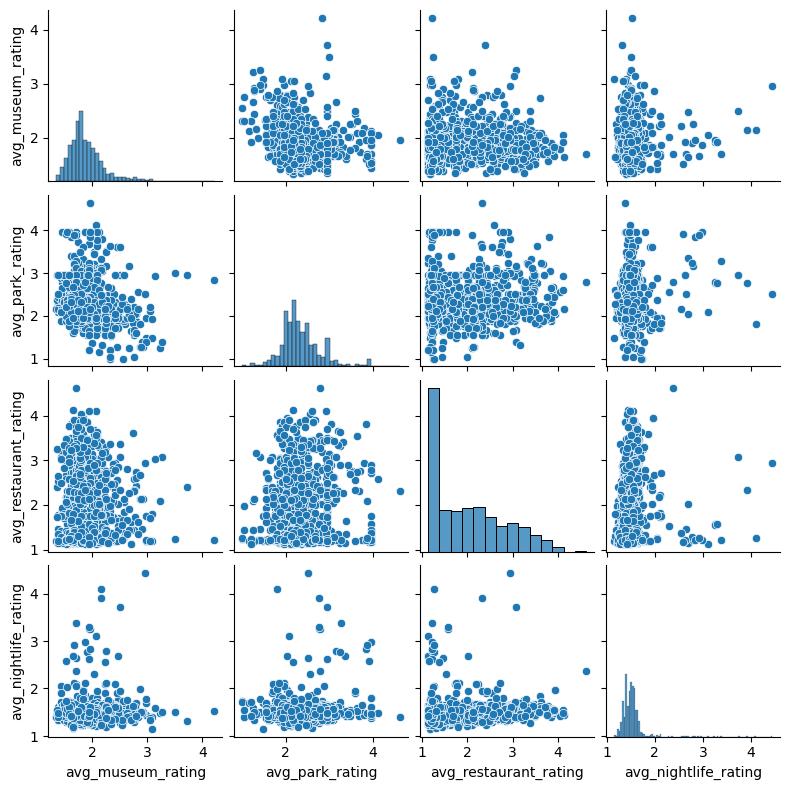

In [65]:
# 2. Visualize the data using pairplot

sns.pairplot(data , height = 2);

In [66]:
# Fit an isolalation forest algorithm using a contamination of 1%

model = IsolationForest(contamination=0.01)
model.fit(data)

C:\Users\ariji\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


IsolationForest(contamination=0.01)

In [68]:
# View the labels 

df['anomaly'] = model.predict(data)
df.head()

,user_id,avg_museum_rating,avg_park_rating,avg_restaurant_rating,avg_nightlife_rating,anomaly
0,User 1,1.93,2.8,3.29,1.62,1
1,User 2,2.02,3.2,3.66,1.64,1
2,User 3,2.22,1.8,1.54,1.53,1
3,User 4,1.45,2.8,1.29,1.57,1
4,User 5,1.51,2.2,2.18,1.57,1


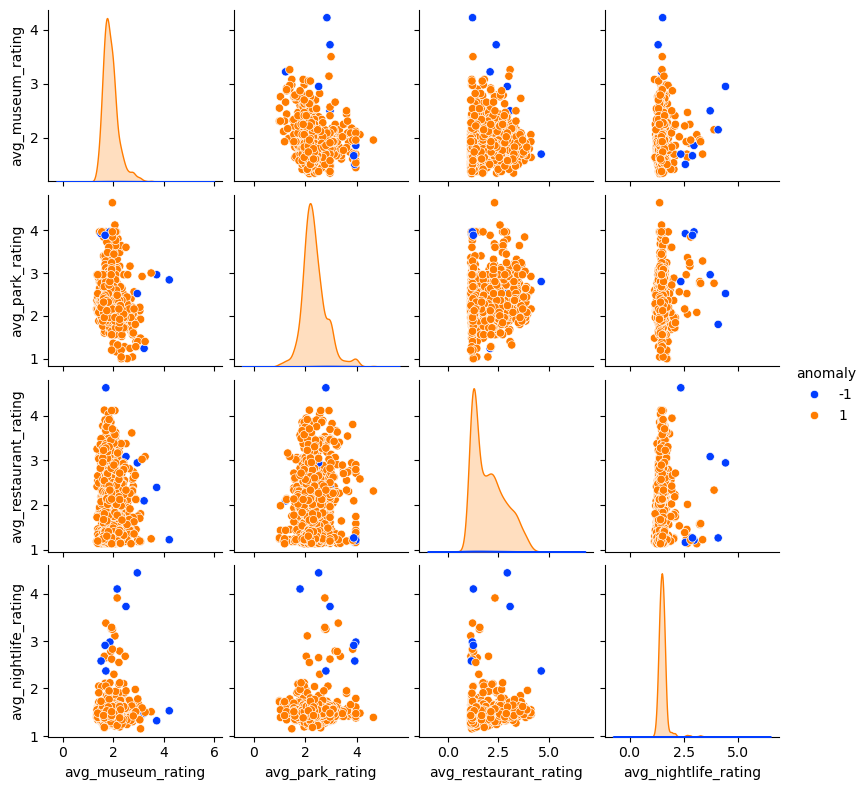

In [75]:
# visualize the anomalies using a pairplot

sns.pairplot(df, hue='anomaly', palette='bright', height=2);

In [76]:
# 6. Modify the contamination to 0.5% to capture fewer anomalies and visualize the differences
model2 = IsolationForest(contamination=0.005)
model2.fit(data)

df['anomaly2'] = model2.predict(data)
df.sort_values('anomaly2').head()

C:\Users\ariji\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


,user_id,avg_museum_rating,avg_park_rating,avg_restaurant_rating,avg_nightlife_rating,anomaly,anomaly2
247,User 248,2.50,2.96,3.08,3.73,-1,-1
422,User 423,1.51,3.92,1.16,2.58,-1,-1
728,User 729,1.86,3.96,1.21,2.98,-1,-1
601,User 602,2.15,1.80,1.26,4.10,-1,-1
666,User 667,2.95,2.52,2.94,4.44,-1,-1


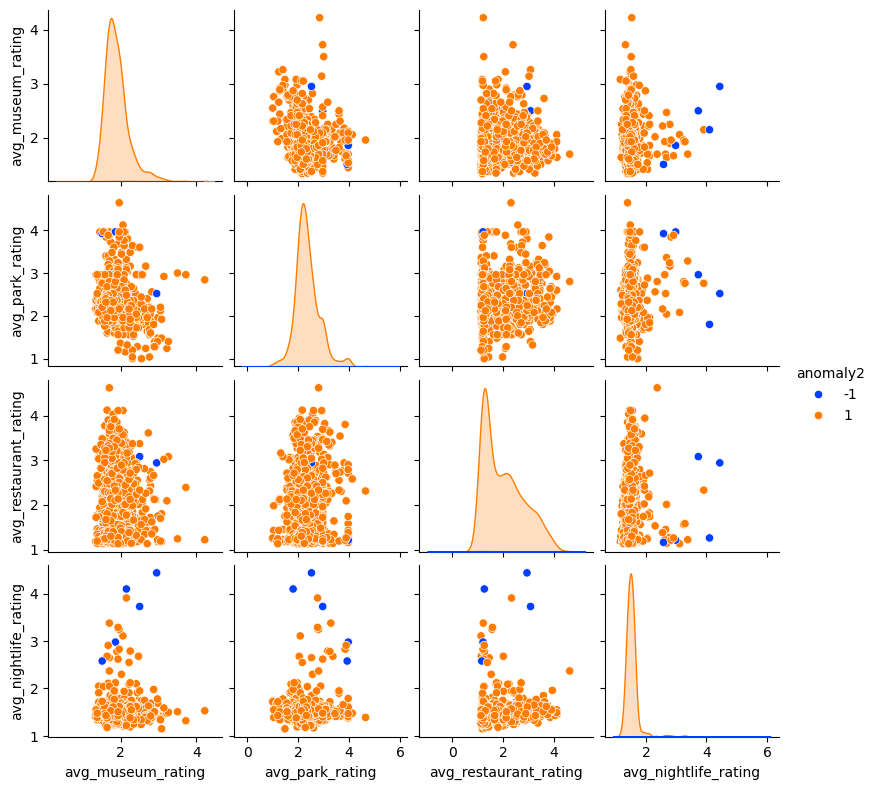

In [77]:
# add the anomalies as the hue on the pair plot
sns.pairplot(df.drop(columns='anomaly'), hue='anomaly2', palette='bright', height=2);

# DBSCAN

In [78]:
# 1. Paste the DBSCAN function from the anomaly detection demo notebook that loops through multiple eps and min_samples values to fit multiple DBSCAN models

import numpy as np
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score

def tune_dbscan(data):

    results = []

    # define a range of eps and min_samples values to loop through
    eps_values = np.arange(.1, 2, .1)
    min_samples_values = np.arange(2, 10, 1)

    # loop through the combinations of eps and min_samples
    for eps in eps_values:
        for min_samples in min_samples_values:
            dbscan = DBSCAN(eps=eps, min_samples=min_samples)
            dbscan.fit(data)
            labels = dbscan.labels_

            # count the number of clusters (excluding noise points labeled as -1)
            n_clusters = len(set(labels)) - (1 if -1 in labels else 0)

            # count the number of noise points (labeled as -1)
            n_noise = list(labels).count(-1)

            # calculate the silhouette score (excluding noise points)
            if n_clusters > 1:  # silhouette score requires at least 2 clusters
                silhouette = silhouette_score(data, labels, metric='euclidean', sample_size=None)
            else:
                silhouette = None

            results.append([eps, min_samples, n_clusters, n_noise, silhouette])

    # put the results in a dataframe
    dbscan_results = pd.DataFrame(results, columns=["Eps", "Min Samples", "Number of Clusters",
                                                    "Number of Noise Points", "Silhouette Score"])
    return dbscan_results

In [79]:
# 2. Apply the function on the tourist rating data set
dbscan_results = tune_dbscan(data)
dbscan_results.head()

,Eps,Min Samples,Number of Clusters,Number of Noise Points,Silhouette Score
0,0.1,2,109,584,-0.310168
1,0.1,3,31,740,-0.458483
2,0.1,4,16,797,-0.445806
3,0.1,5,10,850,-0.382044
4,0.1,6,5,899,-0.178858


In [80]:
# 3. Find the highest silhouette score and note down the eps and min_samples values
dbscan_results.sort_values('Silhouette Score', ascending=False).head()

,Eps,Min Samples,Number of Clusters,Number of Noise Points,Silhouette Score
56,0.8,2,2,7,0.441910
53,0.7,7,2,16,0.405540
42,0.6,4,2,17,0.397147
41,0.6,3,2,14,0.391766
40,0.6,2,2,14,0.391766


In [81]:
# 4. Fit a single DBSCAN model using those eps and min_sample values
dbscan = DBSCAN(eps=0.8, min_samples=2)
dbscan.fit(data)

DBSCAN(eps=0.8, min_samples=2)

In [82]:
# 5. Note the anomalies (-1) and visualize them on a pair plot
df['anomaly_dbscan'] = dbscan.labels_
df.head()

,user_id,avg_museum_rating,avg_park_rating,avg_restaurant_rating,avg_nightlife_rating,anomaly,anomaly2,anomaly_dbscan
0,User 1,1.93,2.8,3.29,1.62,1,1,0
1,User 2,2.02,3.2,3.66,1.64,1,1,0
2,User 3,2.22,1.8,1.54,1.53,1,1,0
3,User 4,1.45,2.8,1.29,1.57,1,1,0
4,User 5,1.51,2.2,2.18,1.57,1,1,0


In [83]:
df[df['anomaly_dbscan'] == -1]

,user_id,avg_museum_rating,avg_park_rating,avg_restaurant_rating,avg_nightlife_rating,anomaly,anomaly2,anomaly_dbscan
247,User 248,2.50,2.96,3.08,3.73,-1,-1,-1
274,User 275,2.15,2.76,2.33,3.91,1,1,-1
501,User 502,3.72,2.96,2.39,1.32,-1,1,-1
601,User 602,2.15,1.80,1.26,4.10,-1,-1,-1
666,User 667,2.95,2.52,2.94,4.44,-1,-1,-1
795,User 796,3.14,2.92,3.02,1.59,1,1,-1
915,User 916,1.70,2.80,4.62,2.37,-1,1,-1


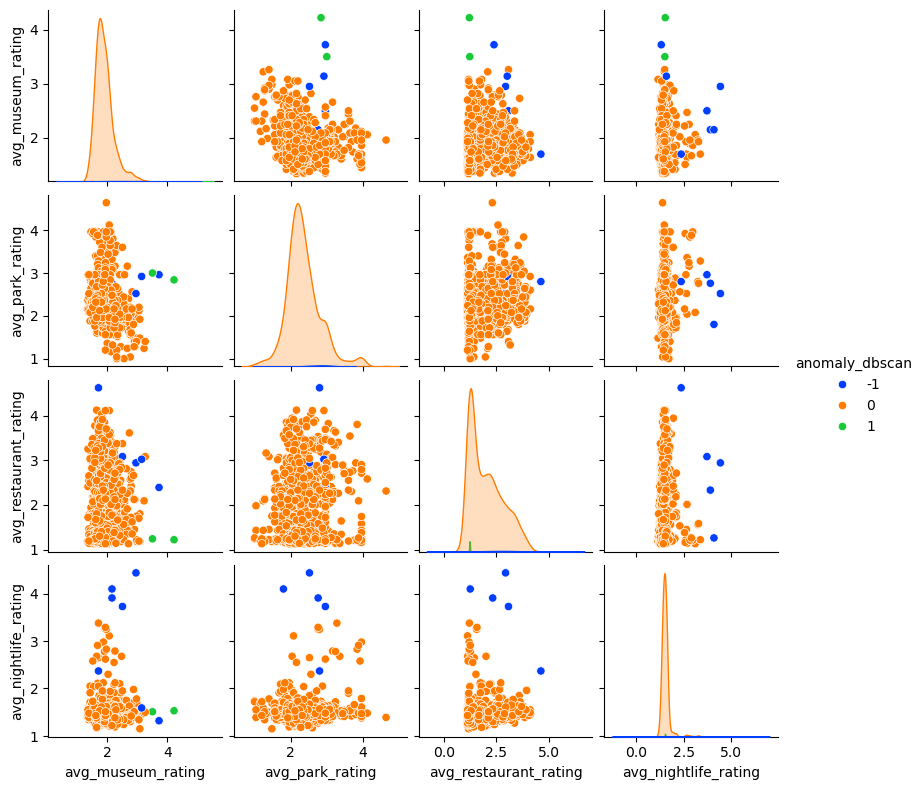

In [84]:
# visualize the anomalies
sns.pairplot(df.drop(['anomaly', 'anomaly2'], axis=1), hue='anomaly_dbscan', palette='bright', height=2);

In [85]:
df.anomaly_dbscan.value_counts()

anomaly_dbscan
 0    971
-1      7
 1      2
Name: count, dtype: int64